## Binary Classification Problem

# Customer Transaction Prediction Project

##  Project Introduction
Banks often aim to identify potential customers who are likely to make a transaction in the near future. Accurately predicting this behavior helps improve marketing efforts and customer engagement strategies. 

In this project, we are provided with anonymized customer data and are tasked to build a machine learning model to predict whether a customer will make a transaction

##  Task Overview
1. **Prepare a complete data analysis & modeling report.**
2. **Build a predictive model using machine learning algorithms.**
3. **Compare the performance of different models and choose the best one.**
4. **Document the challenges faced and techniques used.**


#### Business Case : To predict whether a person will make a transaction or not.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv("train(1).csv")

#### Domain Analysis

#### Basic Checks

In [13]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [15]:
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 202 columns):
 #    Column   Non-Null Count   Dtype  
---   ------   --------------   -----  
 0    ID_code  200000 non-null  object 
 1    target   200000 non-null  int64  
 2    var_0    200000 non-null  float64
 3    var_1    200000 non-null  float64
 4    var_2    200000 non-null  float64
 5    var_3    200000 non-null  float64
 6    var_4    200000 non-null  float64
 7    var_5    200000 non-null  float64
 8    var_6    200000 non-null  float64
 9    var_7    200000 non-null  float64
 10   var_8    200000 non-null  float64
 11   var_9    200000 non-null  float64
 12   var_10   200000 non-null  float64
 13   var_11   200000 non-null  float64
 14   var_12   200000 non-null  float64
 15   var_13   200000 non-null  float64
 16   var_14   200000 non-null  float64
 17   var_15   200000 non-null  float64
 18   var_16   200000 non-null  float64
 19   var_17   200000 non-null  float64
 20   va

- There are no missing values.
- There is only one categorical column.

In [7]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
data.shape

(200000, 202)

#### EDA
- This part is skipped.

#### Data Preprocessing

##### Handling null or corrupt values

In [9]:
data.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

- There are 179902 records with target value 0 (89.95%) and 20098 records with target value 1(10.05%).

In [10]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [11]:
data.isnull().any()

ID_code    False
target     False
var_0      False
var_1      False
var_2      False
           ...  
var_195    False
var_196    False
var_197    False
var_198    False
var_199    False
Length: 202, dtype: bool

- There is no null values.
- No corrupt data.

In [12]:
data.target.isnull().any()

False

In [13]:
data.shape

(200000, 202)

##### Converting Categorical Column Into Numerical Column
- There is one categorical column which will be dropped and not required.

##### Handling Outliers

In [14]:
dt = data.iloc[:, 1:]
IQR = dt.quantile(.75) - dt.quantile(.25)
print("Data1.shape:",data.shape)
df_in = data[~((dt < (dt.quantile(.25) - 1.5 * IQR)) |(dt > (dt.quantile(.75) + 1.5 * IQR))).any(axis=1)]
df_out = data[((dt < (dt.quantile(.25) - 1.5 * IQR)) |(dt > (dt.quantile(.75) + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

Data1.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [15]:
print("df_in.target:\n", df_in['target'].value_counts())
print("df_out.target:\n", df_out['target'].value_counts())

df_in.target:
 target
0    157999
Name: count, dtype: int64
df_out.target:
 target
0    21903
1    20098
Name: count, dtype: int64


- Both classes 0 and 1 include outliers so they cannot be removed.

<Axes: >

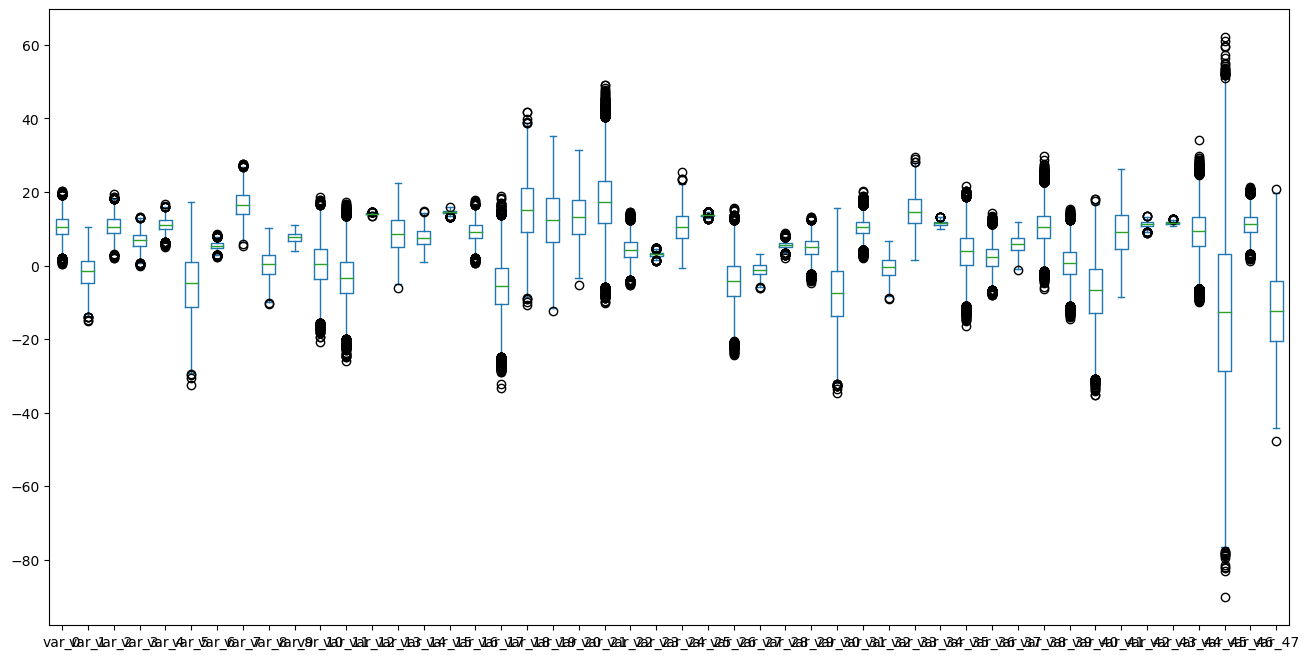

In [16]:
data.iloc[:, 2:50].plot(kind='box', figsize=[16,8])

<Axes: >

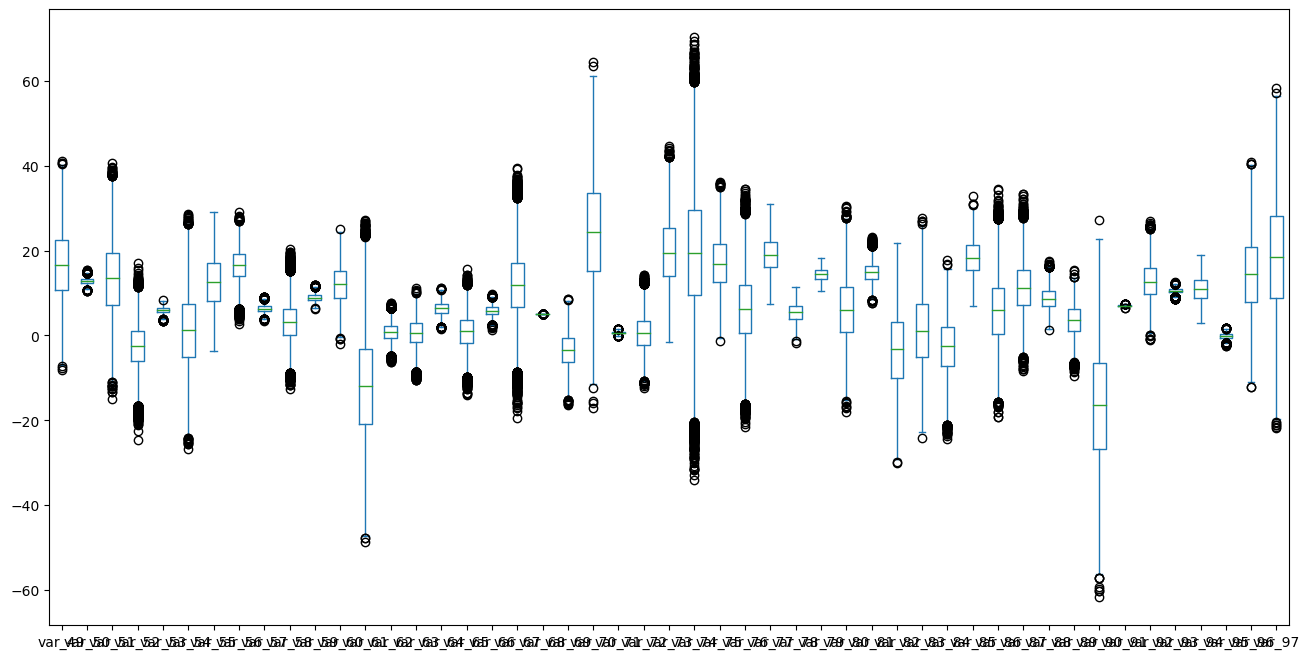

In [17]:
data.iloc[:, 51:100].plot(kind='box', figsize=[16,8])

<Axes: >

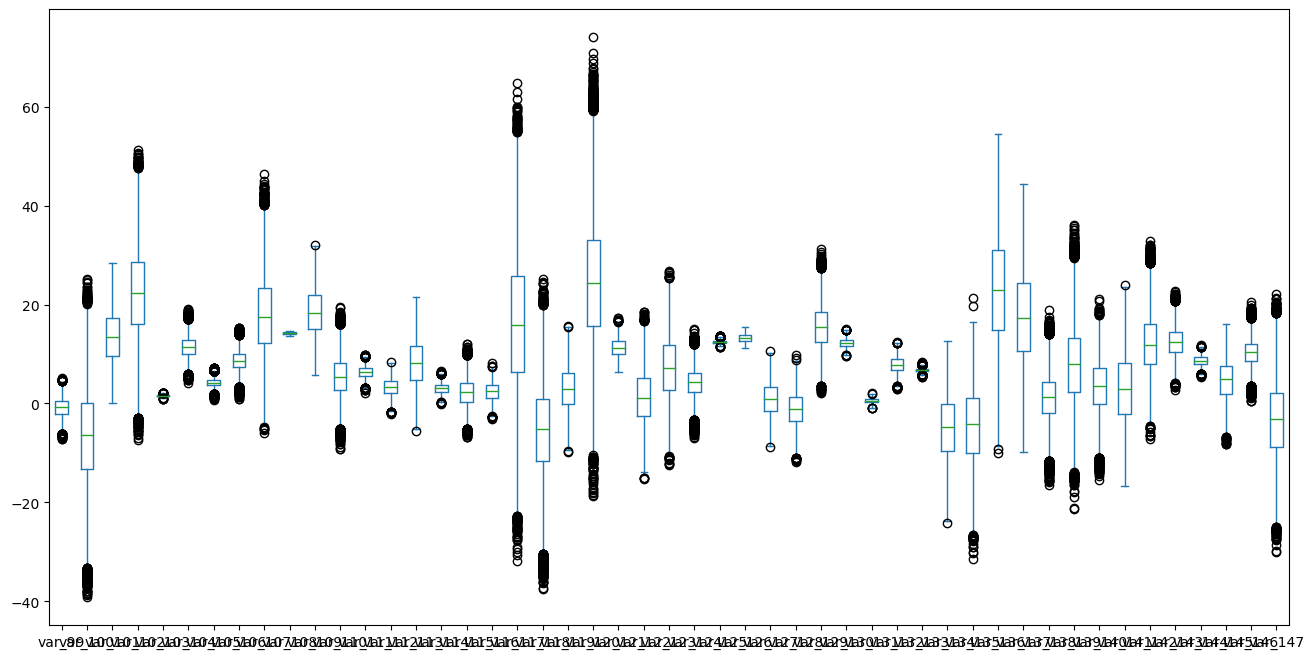

In [18]:
data.iloc[:, 101:150].plot(kind='box', figsize=[16,8])

<Axes: >

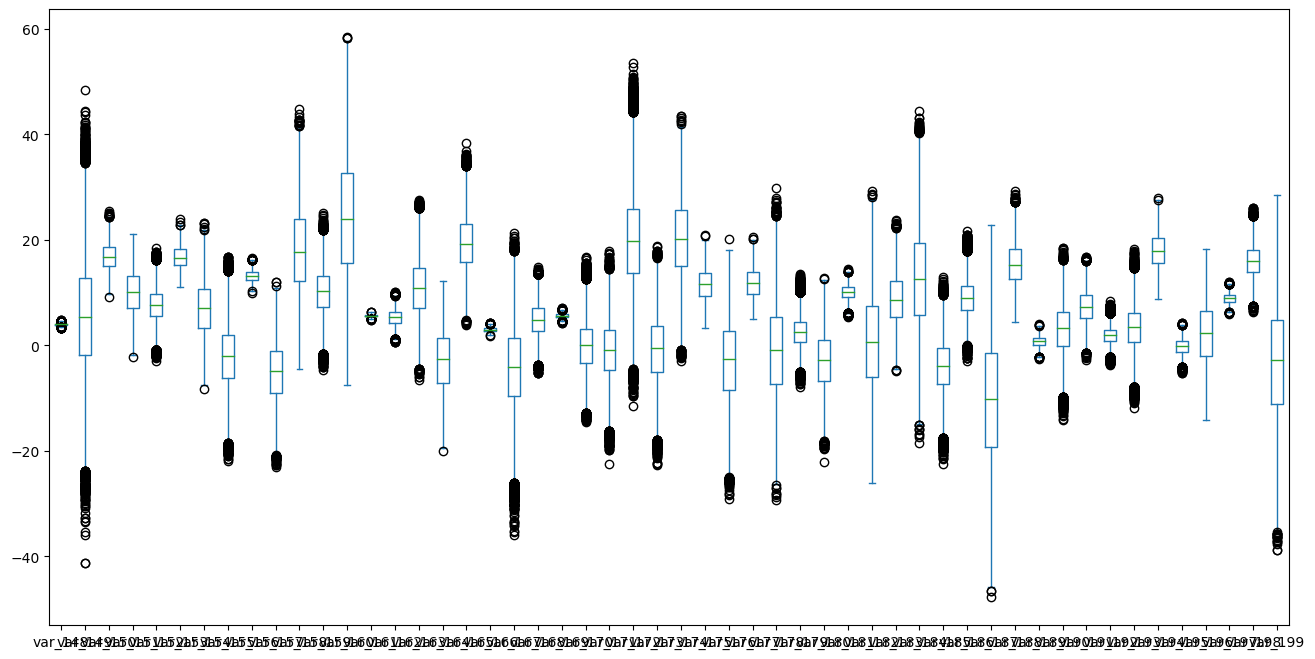

In [19]:
data.iloc[:, 150:].plot(kind='box', figsize=[16,8])

<Axes: >

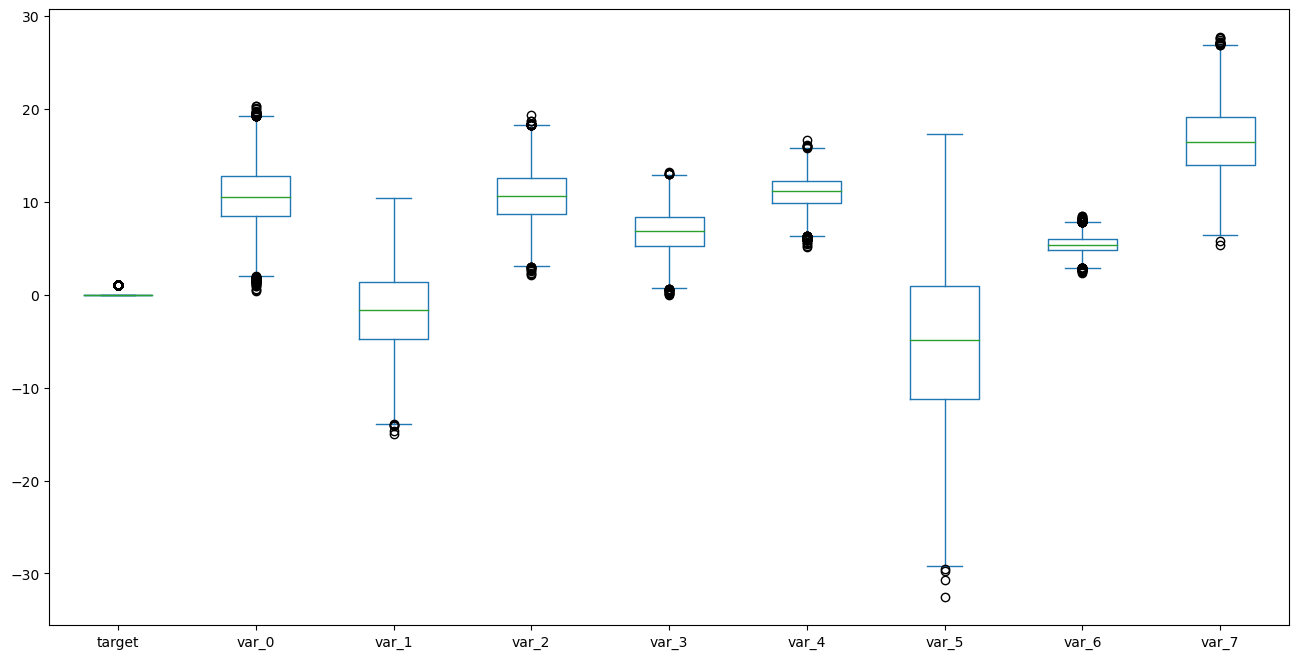

In [20]:
data.iloc[:,1:10].plot(kind='box', figsize=[16,8])

##### Scaling The Data

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dl=['target','ID_code']
scaled_data=sc.fit_transform(data.drop(dl,axis=1))

In [22]:
scaled_data

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

In [23]:
d=pd.DataFrame(scaled_data)
d

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


In [24]:
for i in range(0,200) :
    d.rename(columns={d.columns[i]:f'var_{i}'},inplace=True)
d

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


- d contains scaled data excluding target.

In [25]:
df=pd.concat([d,data.target],axis=1)
df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135,0
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685,0
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681,0
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502,0
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947,0
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154,0
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024,0
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989,0


- This df contains the scaled data including target where target is not scaled.

#### Feature Selection

##### Removing the unwanted columns.

- There are no unwanted columns as 'ID_code' is dropped before.

##### Checking For Collineartiy

In [26]:
d.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,-0.000868,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,0.000052,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,0.003701,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,0.002343,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


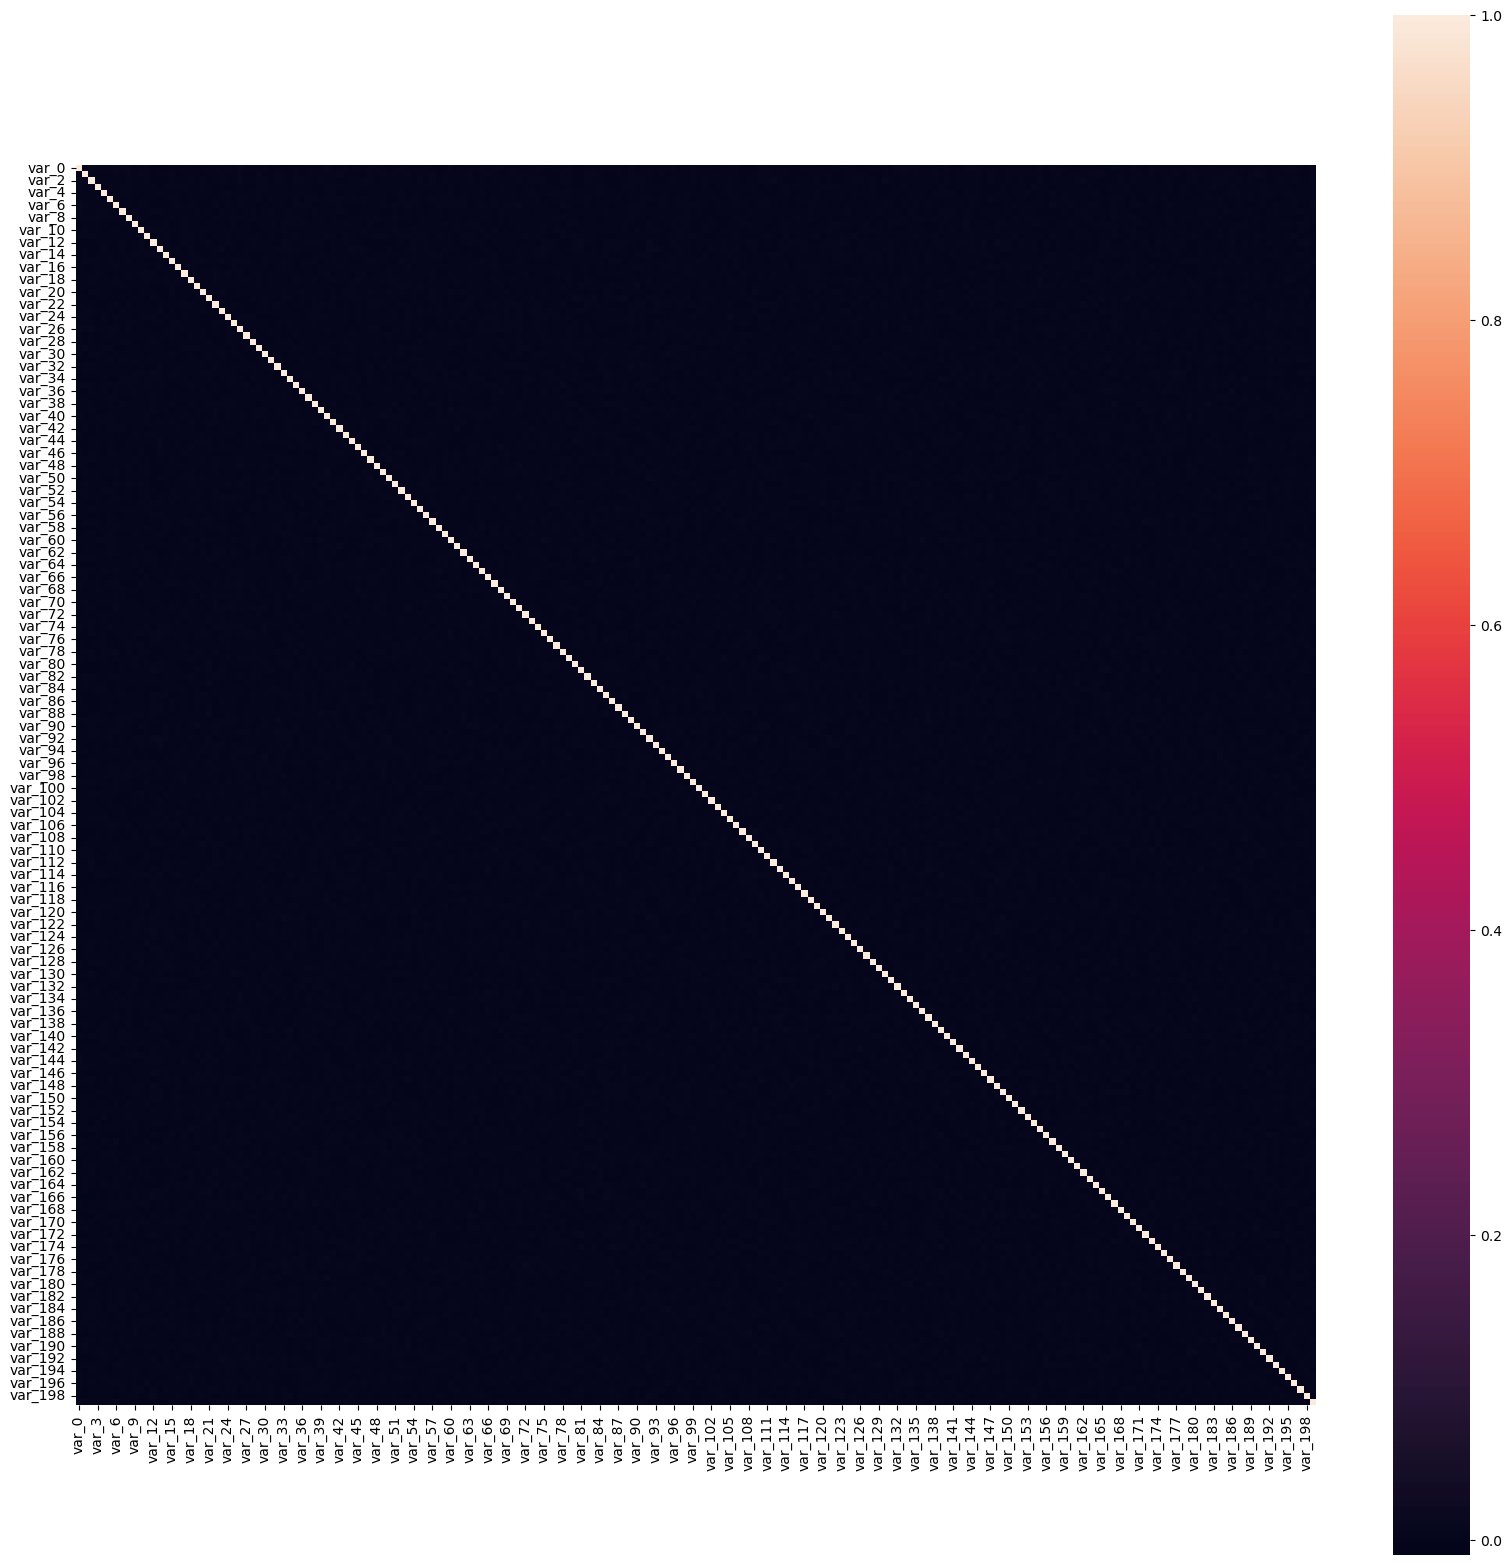

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(d.corr(),square=True)
plt.show()

- There is zero or very less correlation among the independent variables.
- Hence, no need to drop any columns.

##### Checking For Multicolinearity

In [28]:
df.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850,0.052390
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287,0.050343
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855,0.055870
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506,0.011055
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786,0.010915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_196,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,0.000052,...,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607,0.023608
var_197,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,0.003701,...,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991,-0.035303
var_198,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,0.002343,...,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731,-0.053000
var_199,0.003850,0.002287,0.003855,0.000506,-0.000786,0.002767,0.006096,-0.001457,0.000854,0.001070,...,0.003595,-0.001239,-0.000552,-0.005615,0.002042,0.000607,0.004991,-0.004731,1.000000,0.025434


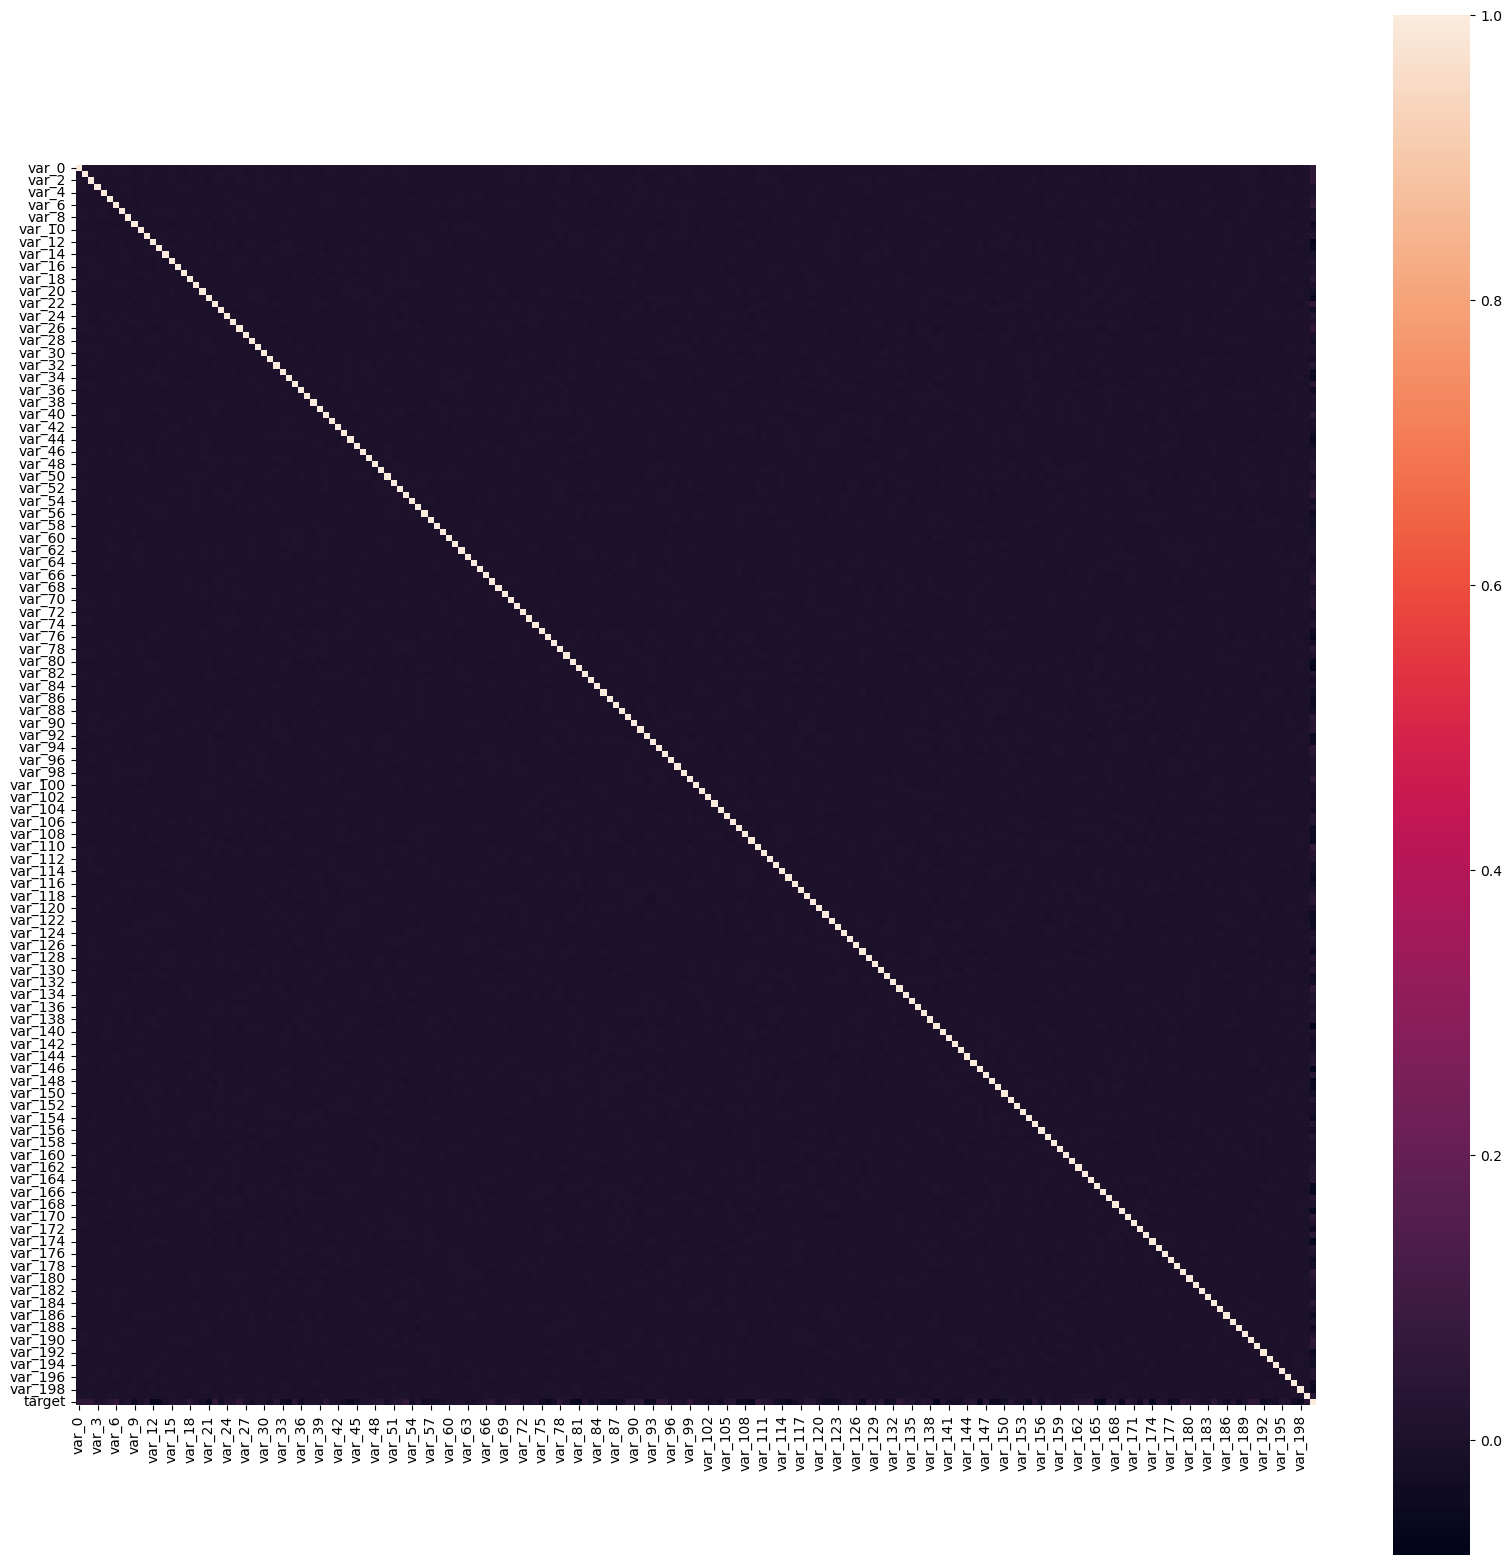

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),square=True)
plt.show()

- Not removing any feature as it would affect the performance of the model.

#### Feature Extraction

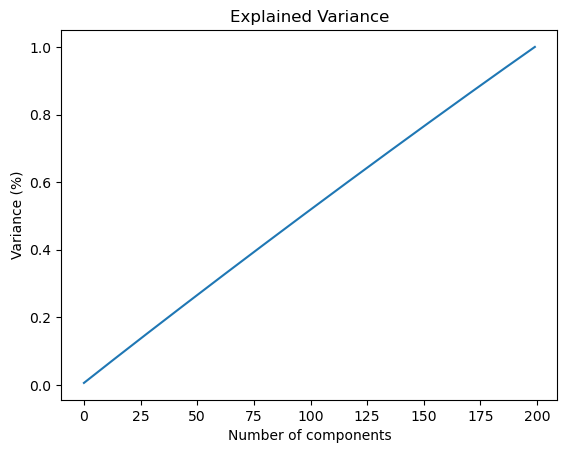

In [30]:
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(df.drop(['target'],axis=1))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.show()

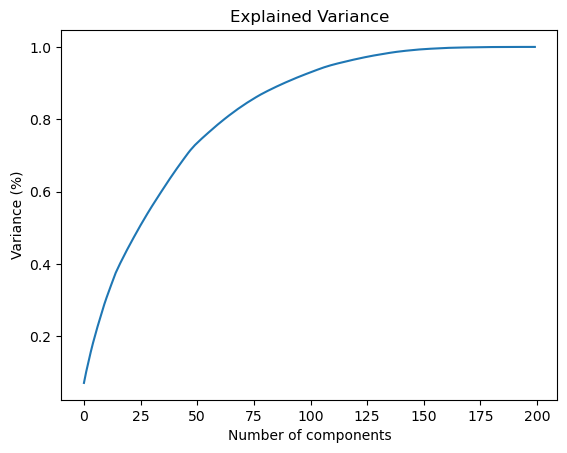

In [31]:
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(data.drop(['ID_code','target'],axis=1))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.show()

- PCA is performing well for unscaled values compared to scaled values.

#### Model Creation

##### Creating Independent and Dependent Variables

In [32]:
X=df.drop('target',axis=1)
y=df.target

In [33]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


In [34]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

In [35]:
y.isnull().sum()

0

- Duplicate values need to be checked before balancing.

In [36]:
df.duplicated().sum()

0

##### Balancing Data

- We apply balancing on training data only.

In [37]:
from collections import Counter                       # Importing counter to check count of each label
from imblearn.over_sampling import SMOTE              # for balancing the data
smote=SMOTE()                                            # Object creation
print("Actual Classes",Counter(y))                                     # Checking count for each class
X_smote,y_smote=smote.fit_resample(X,y)                        # Applying sampling on target variable
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 179902, 1: 20098})
SMOTE Classes Counter({0: 179902, 1: 179902})


###### Creating Training and Testing Data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [39]:
X_test.shape

(89951, 200)

In [40]:
y_train.shape

(269853,)

In [41]:
y_test.shape

(89951,)

#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
LOR=LogisticRegression()
LOR.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred=LOR.predict(X_test)          # Prediction
y_pred                             # Predicted Values By Model

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [44]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

###### Model Evaluation

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [46]:
a1=accuracy_score(y_test,y_pred)
a1

0.7988905070538405

In [47]:
r1=recall_score(y_test,y_pred)
r1

0.8084244272769775

In [48]:
p1=precision_score(y_test,y_pred)
p1

0.7928903639976418

In [49]:
f_1=f1_score(y_test,y_pred)
f_1

0.8005820490773199

In [50]:
cr1=classification_report(y_test,y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     45034
           1       0.79      0.81      0.80     44917

    accuracy                           0.80     89951
   macro avg       0.80      0.80      0.80     89951
weighted avg       0.80      0.80      0.80     89951



#### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
yk_pred=knc.predict(X_test)
yk_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

In [54]:
a2=accuracy_score(y_test,yk_pred)
a2

0.5016842503140598

In [55]:
r2=recall_score(y_test,yk_pred)
r2

1.0

In [56]:
p2=precision_score(y_test,yk_pred)
p2

0.5005181578096968

In [57]:
f_2=f1_score(y_test,yk_pred)
f_2

0.6671270923376256

In [58]:
cr2=classification_report(y_test,yk_pred)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      0.00      0.01     45034
           1       0.50      1.00      0.67     44917

    accuracy                           0.50     89951
   macro avg       0.75      0.50      0.34     89951
weighted avg       0.75      0.50      0.34     89951



#### SVM

In [59]:
from sklearn.svm import SVC
svclassifier = SVC()                           # Base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [60]:
ytr_pred=svclassifier.predict(X_test)
ytr_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [61]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

In [62]:
a3=accuracy_score(y_test,ytr_pred)
a3

0.9512957054396283

In [63]:
r3=recall_score(y_test,ytr_pred)
r3

0.950842665360554

In [64]:
p3=precision_score(y_test,ytr_pred)
p3

0.9515841540038322

In [65]:
f_3=f1_score(y_test,ytr_pred)
f_3

0.9512132651811267

In [66]:
cr3=classification_report(y_test,ytr_pred)
print(cr3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     45034
           1       0.95      0.95      0.95     44917

    accuracy                           0.95     89951
   macro avg       0.95      0.95      0.95     89951
weighted avg       0.95      0.95      0.95     89951



#### DT

In [67]:
from sklearn.tree import DecisionTreeClassifier        # Importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()                            # Object creation for decision tree
dt.fit(X_train,y_train)                                # Training the model
y_hat=dt.predict(X_test)                               # Prediction
y_hat                                                  # Predicted values

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [68]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

In [69]:
a4=accuracy_score(y_test,y_hat)
a4

0.7697190692710476

In [70]:
r4=recall_score(y_test,y_hat)
r4

0.815815838101387

In [71]:
p4=precision_score(y_test,y_hat)
p4

0.7465417133543852

In [72]:
f_4=f1_score(y_test,y_hat)
f_4

0.7796429863194401

In [73]:
cr4=classification_report(y_test,y_hat)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76     45034
           1       0.75      0.82      0.78     44917

    accuracy                           0.77     89951
   macro avg       0.77      0.77      0.77     89951
weighted avg       0.77      0.77      0.77     89951



#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier    # Importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)      # Object creation ,taking 100 decision tree in random forest
rf_clf.fit(X_train,y_train)                           # Training the data

RandomForestClassifier()

In [75]:
y_predict=rf_clf.predict(X_test) #testing
y_predict

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [76]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

In [77]:
a5=accuracy_score(y_test,y_predict)
a5

0.9660148302964947

In [78]:
r5=recall_score(y_test,y_predict)
r5

0.9421377206848187

In [79]:
p5=precision_score(y_test,y_predict)
p5

0.9892930615298298

In [80]:
f_5=f1_score(y_test,y_predict)
f_5

0.9651397488967193

In [81]:
cr5=classification_report(y_test,y_predict)
print(cr5)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     45034
           1       0.99      0.94      0.97     44917

    accuracy                           0.97     89951
   macro avg       0.97      0.97      0.97     89951
weighted avg       0.97      0.97      0.97     89951



#### GB

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()              # Object creation
gbc.fit(X_train,y_train)                     # Fitting the data

GradientBoostingClassifier()

In [83]:
y_gbc=gbc.predict(X_test)
y_gbc

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [84]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

In [85]:
a6=accuracy_score(y_test,y_gbc)
a6

0.8360329512734711

In [86]:
r6=recall_score(y_test,y_gbc)
r6

0.8275708529064719

In [87]:
p6=precision_score(y_test,y_gbc)
p6

0.8414523723288664

In [88]:
f_6=f1_score(y_test,y_gbc)
f_6

0.834453885265958

In [89]:
cr6=classification_report(y_test,y_gbc)
print(cr6)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     45034
           1       0.84      0.83      0.83     44917

    accuracy                           0.84     89951
   macro avg       0.84      0.84      0.84     89951
weighted avg       0.84      0.84      0.84     89951



#### XGB

In [90]:
from xgboost import XGBClassifier       # Importing the model library
xgbc=XGBClassifier()                   # Object creation
xgbc.fit(X_train,y_train)             # Fitting the data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [91]:
y_xgbc=xgbc.predict(X_test)
y_xgbc

array([0, 1, 1, ..., 0, 0, 1])

In [92]:
y_test

62251     0
286258    1
241202    1
41282     0
53404     0
         ..
329503    1
286536    1
161218    0
174949    0
222276    1
Name: target, Length: 89951, dtype: int64

In [93]:
a7=accuracy_score(y_test,y_xgbc)
a7

0.8945981701148403

In [94]:
r7=recall_score(y_test,y_xgbc)
r7

0.8872364583565242

In [95]:
p7=precision_score(y_test,y_xgbc)
p7

0.900243968555164

In [96]:
f_7=f1_score(y_test,y_xgbc)
f_7

0.8936928855749284

In [97]:
cr7=classification_report(y_test,y_xgbc)
print(cr7)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     45034
           1       0.90      0.89      0.89     44917

    accuracy                           0.89     89951
   macro avg       0.89      0.89      0.89     89951
weighted avg       0.89      0.89      0.89     89951



In [98]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN', 'Support Vector Machine','Decision Tree', 'Random Forest',
                'Gradient Boosting', 'XGBoost'],
    'f1_score' : [f_1,f_2,f_3,f_4,f_5,f_6,f_7],
    'accuracy_score' : [a1,a2,a3,a4,a5,a6,a7],
    'precision_score' : [p1,p2,p3,p4,p5,p6,p7],
    'recall_score' : [r1,r2,r3,r4,r5,r6,r7]

})

models.sort_values(by='f1_score')

,Model,f1_score,accuracy_score,precision_score,recall_score
1,KNN,0.667127,0.501684,0.500518,1.000000
3,Decision Tree,0.779643,0.769719,0.746542,0.815816
0,Linear Regression,0.800582,0.798891,0.792890,0.808424
5,Gradient Boosting,0.834454,0.836033,0.841452,0.827571
6,XGBoost,0.893693,0.894598,0.900244,0.887236
2,Support Vector Machine,0.951213,0.951296,0.951584,0.950843
4,Random Forest,0.965140,0.966015,0.989293,0.942138


## Conclusion

After training and evaluating various models, **XGBoost** performed the best with a high ROC AUC score, indicating its robustness in handling this classification problem.

This model is recommended for future deployment due to its ability to handle high-dimensional data and imbalance efficiently.

---

##  Challenges Faced

1. **Anonymized Features**  
   - The dataset has no meaningful feature names, making Exploratory Data Analysis (EDA) limited.
   - Unable to interpret feature importance from a business perspective.

2. **Imbalanced Dataset**  
   - Fewer positive samples (`target = 1`) than negatives.
   - Required careful choice of evaluation metrics (ROC AUC, not just accuracy).

3. **High Dimensionality (200 features)**  
   - Required models that can handle many features effectively (e.g., XGBoost, Random Forest).
